In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten, Lambda, Concatenate, Cropping2D
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Sequential

In [2]:
##Pillow test
import sys
from PIL import Image
sys.modules['Image'] = Image

In [3]:
from PIL import Image
print(Image.__file__)

/home/pascal_steiger/.local/lib/python3.8/site-packages/PIL/Image.py


In [4]:
import Image
print(Image.__file__)

/home/pascal_steiger/.local/lib/python3.8/site-packages/PIL/Image.py


In [5]:
def load_image_paths(container_path):
    image_dir = pathlib.Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    image_paths = []
    flat_data = []
    target = []
    count = 0
    train_img_path = []
    train_label = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            train_img_path.append(str(file))
            train_label.append(categories[i])

    X = np.array(train_img_path)
    y = np.array(train_label)
    catStringArr = np.array(categories)

    
    return X, y, catStringArr

def split_image(x):
    img_w = img_h = 640
    split_w = split_h = 320
    X_points = [0, 320-112, 640-224]
    Y_points = [0, 320-112, 640-224]
    
    X_points = Y_points = [int((img_w-224)/3)*i for i in range(3)]

    image=[]

    for i in Y_points:
        for j in X_points:
            image.append(x[i:i+split_h, j:j+split_w])
            print(image[-1].shape)
            
    return np.stack(image)
            
            

In [6]:
def get_magic_numbers(size, crop_size):
    x0 = 0
    x1 = (size//2)-(crop_size//2)
    x2 = size - crop_size
    return x0, x1, x2

(640, 640, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(320, 320, 3)
(9, 320, 320, 3)


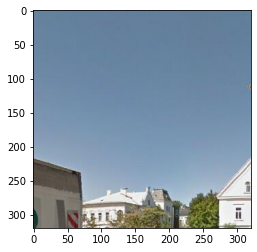

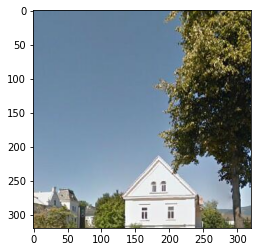

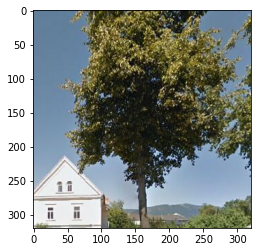

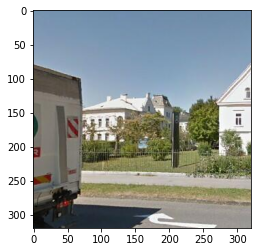

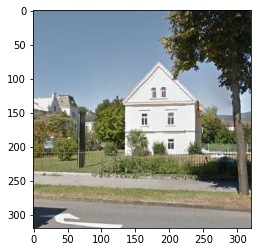

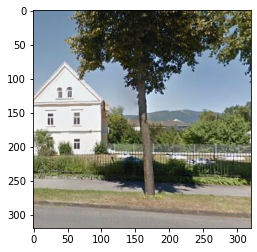

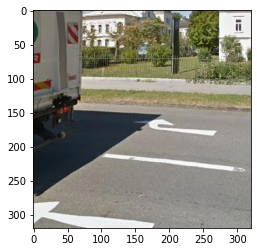

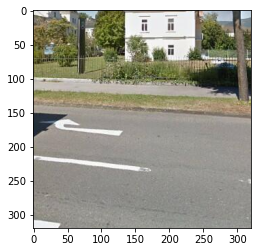

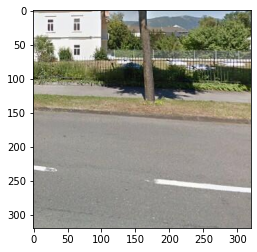

In [7]:
im = cv.imread("/home/pascal_steiger/Downloads/data/AUT/img_AUT_46.608879481375,13.84539238628455_0.jpg")
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(im.shape)
res = split_image(im)
print(res.shape)
for i in res:
    plt.figure()
    plt.imshow(i)

In [8]:
X = []
y = []
X, y, labelStringArr = load_image_paths("/home/pascal_steiger/Downloads/data/")
img_df = pd.DataFrame(zip(X, y), columns=["path", "label"])

img_df.sample(n=10)

,path,label
23607,/home/pascal_steiger/Downloads/data/CHE/img_46...,CHE
9401,/home/pascal_steiger/Downloads/data/LTU/img_LT...,LTU
11232,/home/pascal_steiger/Downloads/data/SVN/img_SV...,SVN
2056,/home/pascal_steiger/Downloads/data/ISL/img_IS...,ISL
20213,/home/pascal_steiger/Downloads/data/EST/img_ES...,EST
22571,/home/pascal_steiger/Downloads/data/NLD/img_53...,NLD
3144,/home/pascal_steiger/Downloads/data/IRL/img_52...,IRL
12505,/home/pascal_steiger/Downloads/data/FIN/img_FI...,FIN
10654,/home/pascal_steiger/Downloads/data/AUT/img_AU...,AUT
24369,/home/pascal_steiger/Downloads/data/CHE/img_47...,CHE


In [9]:
train_df, test_df = train_test_split(img_df, shuffle=True, test_size=0.2, random_state=42)


print(train_df.sample(n=5))
print(train_df.shape)
print(test_df.sample(n=5))
print(test_df.shape)


                                                    path label
19183  /home/pascal_steiger/Downloads/data/BEL/img_50...   BEL
12670  /home/pascal_steiger/Downloads/data/FIN/img_FI...   FIN
15826  /home/pascal_steiger/Downloads/data/BGR/img_BG...   BGR
20923  /home/pascal_steiger/Downloads/data/POL/img_PO...   POL
8118   /home/pascal_steiger/Downloads/data/FRA/img_49...   FRA
(21234, 2)
                                                    path label
3858   /home/pascal_steiger/Downloads/data/IRL/img_54...   IRL
3298   /home/pascal_steiger/Downloads/data/IRL/img_52...   IRL
26097  /home/pascal_steiger/Downloads/data/SWE/img_SW...   SWE
16823  /home/pascal_steiger/Downloads/data/PRT/img_PR...   PRT
18724  /home/pascal_steiger/Downloads/data/BEL/img_50...   BEL
(5309, 2)


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    fill_mode="constant",
    cval=0.,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    #zoom_range=0.15,
    horizontal_flip=True,
    #preprocessing_function=split_image
)

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  #preprocessing_function=split_image
                                 )

In [11]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col="path",
        y_col="label",
        batch_size=8,
        target_size=(500,500),
        class_mode="sparse",
        seed=42
)


validation_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col="path",
        y_col="label",
        batch_size=8,
        target_size=(500,500),
        class_mode="sparse",
        seed=42
)

Found 21234 validated image filenames belonging to 26 classes.
Found 5309 validated image filenames belonging to 26 classes.


In [12]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
with tf.device("/device:GPU:1"):
    model = ResNet50V2(include_top=True,weights="imagenet")
    print(model.summary())

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [15]:
model.layers.pop()
with tf.device("/device:GPU:1"):
    model.trainable = True   


    I = Input(shape=(500, 500, 3))
#I = Input(shape=(9,224,224, 3))

    x0, x1, x2 = get_magic_numbers(500,224)
    size=224
    zero=0
    first = 188
    sec= 412
    third=600
    
    crop=[]
    crop.append(Cropping2D(cropping=((x0, x2), (x0, x2)))(I))
    crop.append(Cropping2D(cropping=((x0, x2), (x1, x1)))(I))
    crop.append(Cropping2D(cropping=((x0, x2), (x2, x0)))(I))
    crop.append(Cropping2D(cropping=((x1, x1), (x0, x2)))(I))
    crop.append(Cropping2D(cropping=((x1, x1), (x1, x1)))(I))
    crop.append(Cropping2D(cropping=((x1, x1), (x2, x0)))(I))
    crop.append(Cropping2D(cropping=((x2, x0), (x0, x2)))(I))
    crop.append(Cropping2D(cropping=((x2, x0), (x1, x1)))(I))
    crop.append(Cropping2D(cropping=((x2, x0), (x2, x0)))(I))
    
    

    resnets = []
    denses1 = []
    denses2 = []
    for idx in range(9):
        resnets.append(model(crop[idx]))
        
    #for idx in range(9):
    #    denses1.append(Dense(256, activation='relu')(resnets[idx]))
    for idx in range(9):
        denses2.append(Dense(64, activation='relu')(resnets[idx]))
    conc=Concatenate(axis=1)(denses2)
    
#dense1=Dense(256, activation='relu', name='my_dense_relu1')(resnets)
#dense2=Dense(64, activation='relu', name='my_dense_relu2')(dense1)
    flat1=Flatten()(conc)
    dense3=Dense(26, activation='softmax', name='my_dense_softmax')(flat1)




    test_model = tf.keras.Model(inputs=I, outputs=dense3, name="TL-Model")


    test_model.summary()


Model: "TL-Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
cropping2d_18 (Cropping2D)      (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
cropping2d_19 (Cropping2D)      (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
cropping2d_20 (Cropping2D)      (None, 224, 224, 3)  0           input_4[0][0]                    
___________________________________________________________________________________________

In [16]:
# define callbacks for early stopping

early_stopping = EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_sparse_categorical_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [17]:
with tf.device("/device:GPU:1"):
    test_model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])


    history = test_model.fit(
          train_generator,
          epochs=200,
          verbose = 1,
          callbacks=callbacks,
          #steps_per_epoch=2000 // 32,
          validation_data=validation_generator)
    test_model.save('CNN-TL_v4.h5')

Epoch 1/200
2655/2655 [==============================] - 2222s 823ms/step - loss: 3.1804 - sparse_categorical_accuracy: 0.0678 - val_loss: 3.2854 - val_sparse_categorical_accuracy: 0.0605
Epoch 2/200
2655/2655 [==============================] - 2178s 820ms/step - loss: 3.1098 - sparse_categorical_accuracy: 0.0885 - val_loss: 3.6933 - val_sparse_categorical_accuracy: 0.0541
Epoch 3/200
2655/2655 [==============================] - 2178s 820ms/step - loss: 3.1012 - sparse_categorical_accuracy: 0.0892 - val_loss: 3.5221 - val_sparse_categorical_accuracy: 0.0644
Epoch 4/200
2655/2655 [==============================] - 2229s 839ms/step - loss: 3.0768 - sparse_categorical_accuracy: 0.0957 - val_loss: 3.4194 - val_sparse_categorical_accuracy: 0.0646
Epoch 5/200
2655/2655 [==============================] - 2176s 820ms/step - loss: 3.0346 - sparse_categorical_accuracy: 0.1070 - val_loss: 3.5977 - val_sparse_categorical_accuracy: 0.0750
Epoch 6/200
2655/2655 [==============================] - 218

2655/2655 [==============================] - 2193s 826ms/step - loss: 1.5685 - sparse_categorical_accuracy: 0.5070 - val_loss: 2.4170 - val_sparse_categorical_accuracy: 0.3289
Epoch 45/200
2655/2655 [==============================] - 2192s 825ms/step - loss: 1.5353 - sparse_categorical_accuracy: 0.5128 - val_loss: 2.1265 - val_sparse_categorical_accuracy: 0.3833
Epoch 46/200
2655/2655 [==============================] - 2194s 826ms/step - loss: 1.5168 - sparse_categorical_accuracy: 0.5227 - val_loss: 2.0966 - val_sparse_categorical_accuracy: 0.4010
Epoch 47/200
2655/2655 [==============================] - 2192s 826ms/step - loss: 1.4848 - sparse_categorical_accuracy: 0.5310 - val_loss: 2.2525 - val_sparse_categorical_accuracy: 0.3773
Epoch 48/200
2655/2655 [==============================] - 2193s 826ms/step - loss: 1.4661 - sparse_categorical_accuracy: 0.5367 - val_loss: 2.1047 - val_sparse_categorical_accuracy: 0.4095
Epoch 49/200
2655/2655 [==============================] - 2189s 824m

2655/2655 [==============================] - 2196s 827ms/step - loss: 0.4530 - sparse_categorical_accuracy: 0.8523 - val_loss: 2.5499 - val_sparse_categorical_accuracy: 0.4487
Epoch 87/200
2655/2655 [==============================] - 2197s 827ms/step - loss: 0.4420 - sparse_categorical_accuracy: 0.8568 - val_loss: 2.4817 - val_sparse_categorical_accuracy: 0.4592
Epoch 88/200
2655/2655 [==============================] - 2196s 827ms/step - loss: 0.4331 - sparse_categorical_accuracy: 0.8608 - val_loss: 2.5403 - val_sparse_categorical_accuracy: 0.4564
Epoch 89/200
2655/2655 [==============================] - 2196s 827ms/step - loss: 0.4207 - sparse_categorical_accuracy: 0.8639 - val_loss: 2.6012 - val_sparse_categorical_accuracy: 0.4509
Epoch 90/200
2655/2655 [==============================] - 2196s 827ms/step - loss: 0.4274 - sparse_categorical_accuracy: 0.8617 - val_loss: 2.5993 - val_sparse_categorical_accuracy: 0.4492
Epoch 91/200
2655/2655 [==============================] - 2196s 827m

/home/pascal_steiger/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


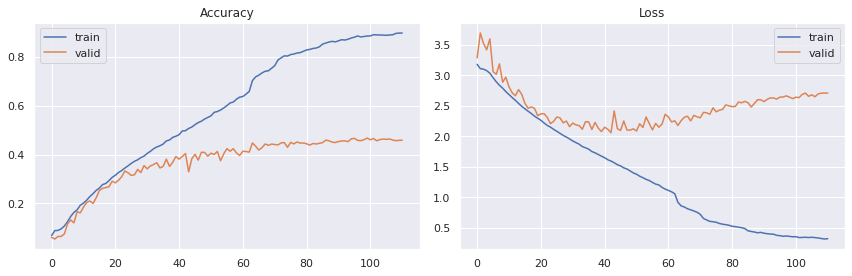

In [18]:
# plot training and validation metrics

sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['sparse_categorical_accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_sparse_categorical_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.savefig('CNN(224,224)-TL_v4.png')

plt.show()

In [19]:
test_model.save('CNN-TL_v4_fullNet.h5')

/home/pascal_steiger/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
with tf.device("/device:GPU:1"):
    history2 = new_model.fit(
          train_generator,
          epochs=180,
          verbose = 1,
          callbacks=callbacks,
          #steps_per_epoch=2000 // 32,
          validation_data=validation_generator)
    new_model.save_weights('CNN-TL_v5.h5')

In [ ]:
# plot training and validation metrics

sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history2.epoch, y=history2.history['sparse_categorical_accuracy'], label='train')
sns.lineplot(x=history2.epoch, y=history2.history['val_sparse_categorical_accuracy'], label='valid')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history2.epoch, y=history2.history['loss'], label='train')
sns.lineplot(x=history2.epoch, y=history2.history['val_loss'], label='valid')
plt.title('Loss')
plt.tight_layout()

plt.savefig('CNN(224,224)-TL_v5.png')

plt.show()